In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris= load_iris()
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["answer"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)

In [3]:
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
df["labels"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),answer,labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [5]:
# 真實的資料
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

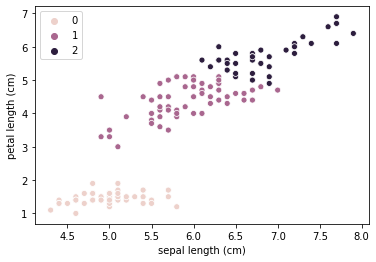

In [6]:
# 畫圖注意
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(df["sepal length (cm)"],
               df["petal length (cm)"],
               hue=cluster.labels_)

In [7]:
from sklearn.metrics import silhouette_score
xs = []
ys = []
for k in range(2, 6):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster.labels_)
    xs.append(k)
    ys.append(s)
print("k值:", xs)
print("Silhouette(親疏有別分數):", ys)

k值: [2, 3, 4, 5]
Silhouette(親疏有別分數): [0.681046169211746, 0.5528190123564091, 0.49721766487109686, 0.4887488870931048]


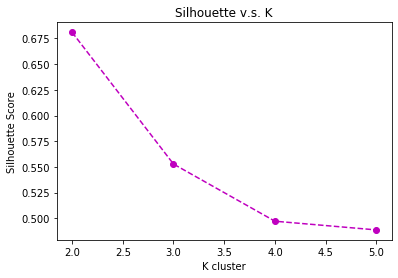

In [8]:
plt.title("Silhouette v.s. K")
plt.xlabel("K cluster")
plt.ylabel("Silhouette Score")
plt.plot(xs, ys, "o--m")